In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("../Datasets/alltrails-data.csv")
df.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


trail_id, name, area_name, city_name, state_name, country_name, _geoloc, popularity, length, elevation_gain, difficulty_rating, route_type, visitor_usage, avg_rating, num_reviews, features, activities, units 

In [3]:

columns_to_check = ['avg_rating', 'difficulty_rating', 'state_name', 'route_type', 'features', 'length', 'elevation_gain', 'visitor_usage', 'activities', 'units']
columns_to_drop = ['trail_id', 'name', 'country_name', '_geoloc', 'visitor_usage', 'avg_rating', 'units']
# Loop through each column and print unique values
for col in columns_to_check:
    unique_vals = df[col].dropna().unique() 
    print(f"\n{col} has {len(unique_vals)} unique value(s):")

    for val in unique_vals[:20]:
        print(f" - {val}")



avg_rating has 10 unique value(s):
 - 5.0
 - 4.5
 - 4.0
 - 3.0
 - 3.5
 - 0.0
 - 2.0
 - 1.0
 - 2.5
 - 1.5

difficulty_rating has 4 unique value(s):
 - 5
 - 3
 - 1
 - 7

state_name has 30 unique value(s):
 - Alaska
 - Arizona
 - Arkansas
 - California
 - Colorado
 - Florida
 - Georgia
 - Indiana
 - Kentucky
 - Maine
 - Michigan
 - Minnesota
 - Missouri
 - Montana
 - Nevada
 - New Mexico
 - North Carolina
 - North Dakota
 - Ohio
 - Oregon

route_type has 3 unique value(s):
 - out and back
 - loop
 - point to point

features has 744 unique value(s):
 - ['dogs-no', 'forest', 'river', 'views', 'waterfall', 'wild-flowers', 'wildlife']
 - ['dogs-no', 'forest', 'views', 'wild-flowers', 'wildlife']
 - ['dogs-no', 'partially-paved', 'views', 'wildlife']
 - ['dogs-no', 'forest', 'lake', 'kids', 'views', 'wild-flowers', 'wildlife']
 - ['dogs-no', 'lake', 'views', 'wild-flowers', 'wildlife']
 - ['dogs-no', 'forest', 'views', 'wildlife']
 - ['dogs-no', 'forest', 'kids', 'views', 'wild-flowers', 'wil

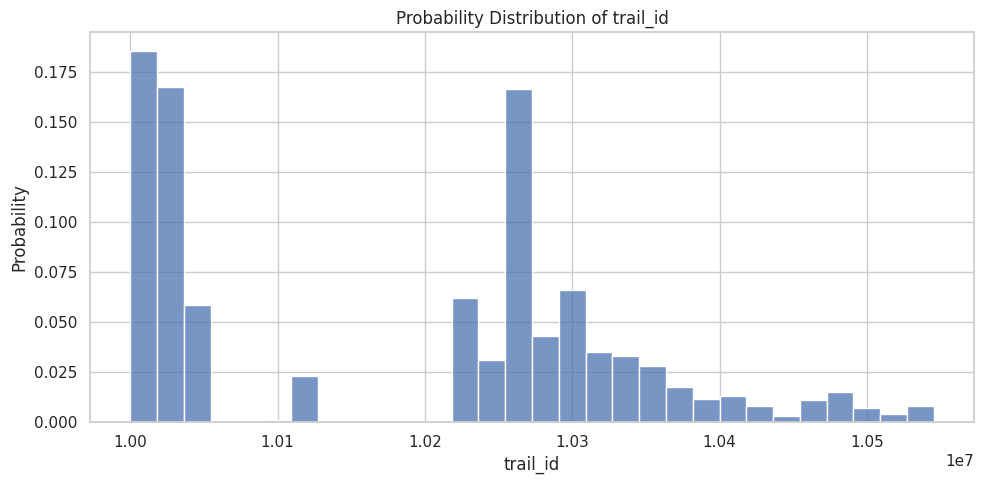

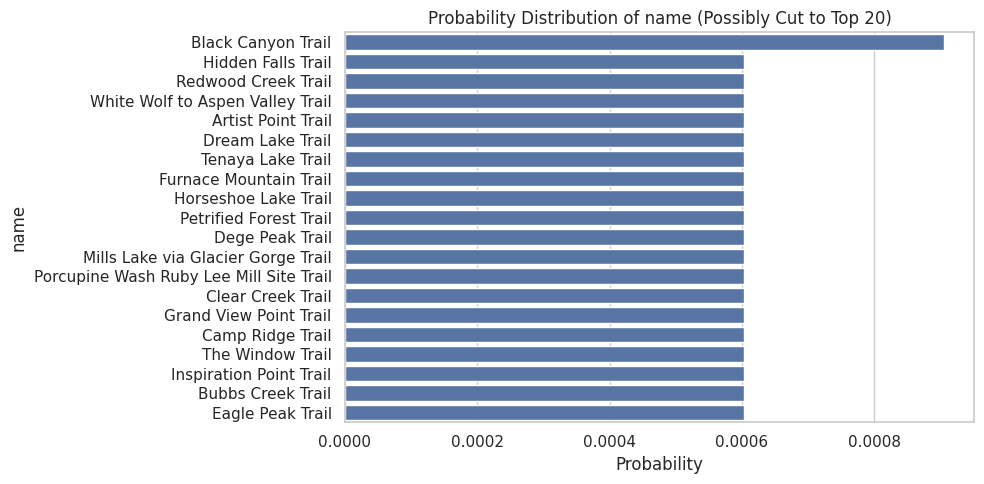

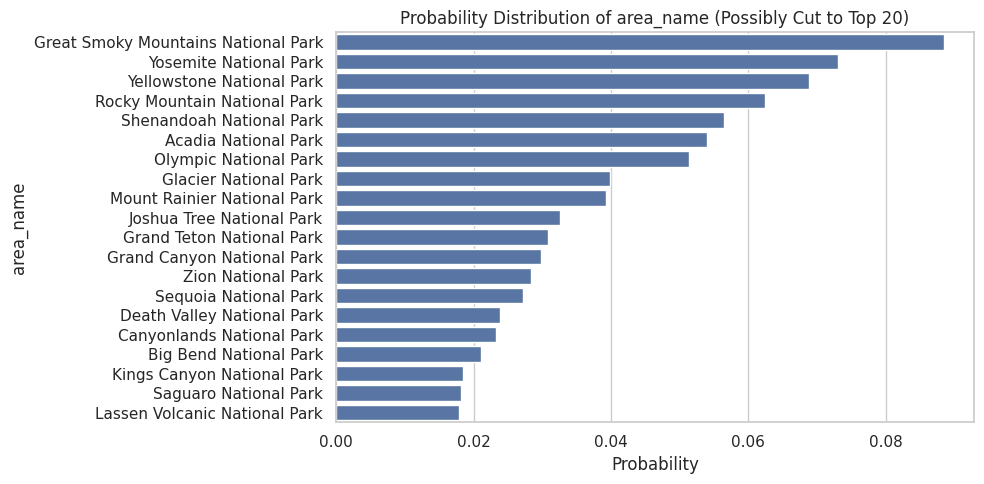

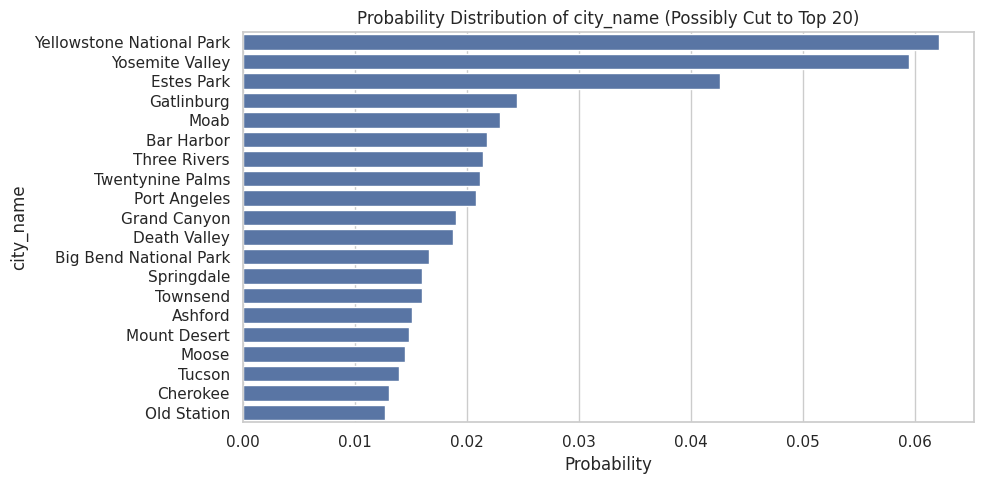

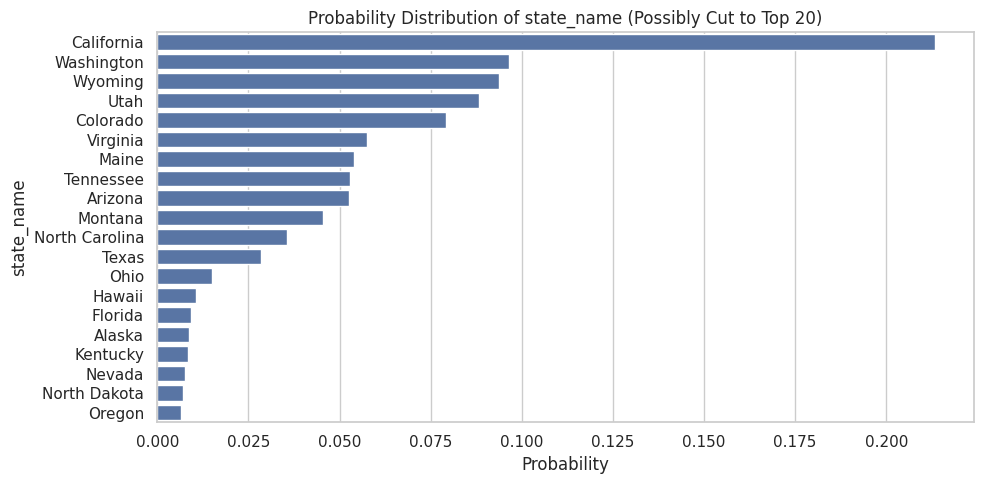

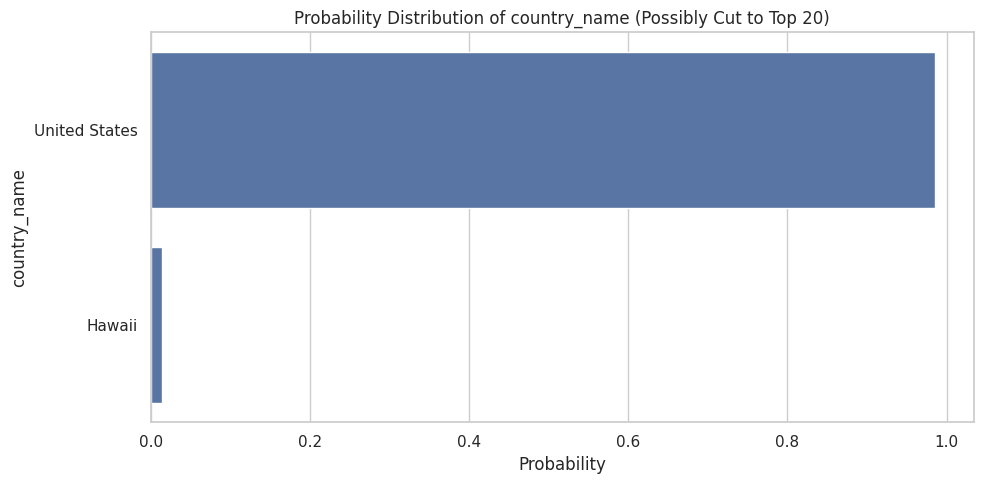

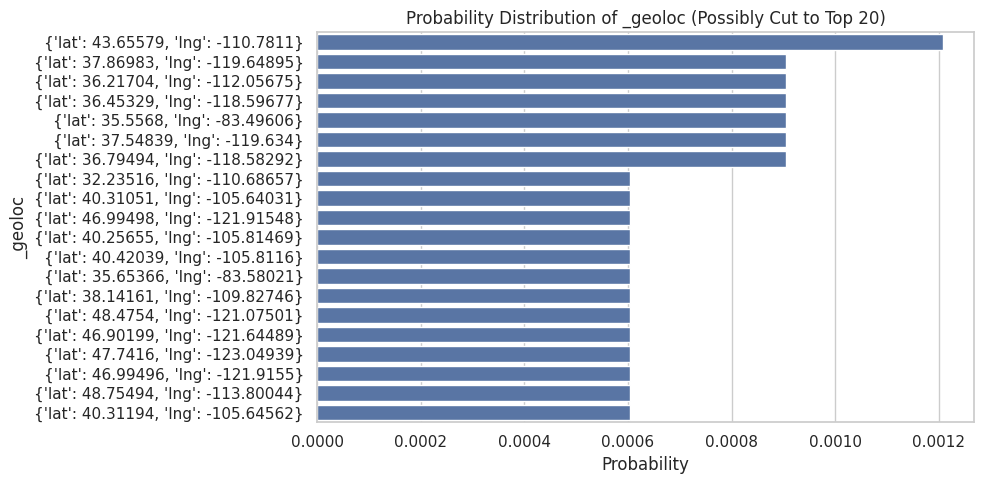

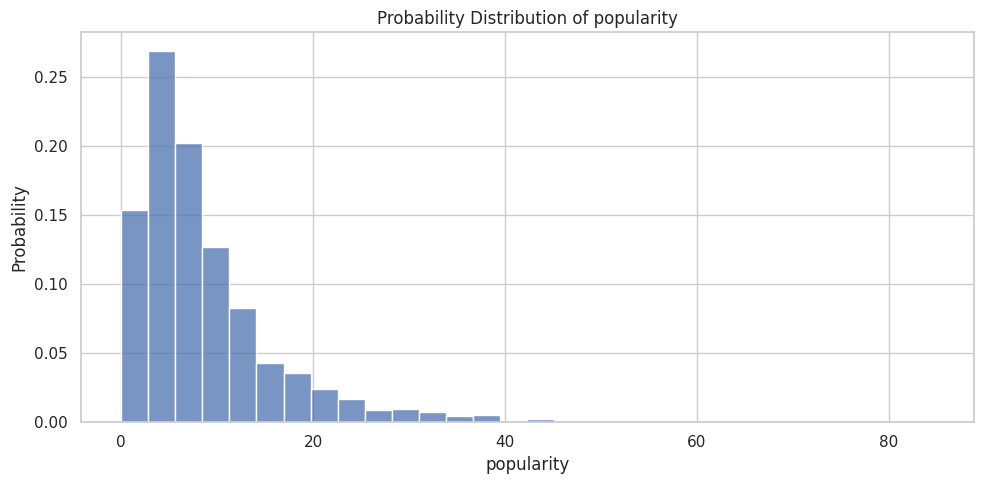

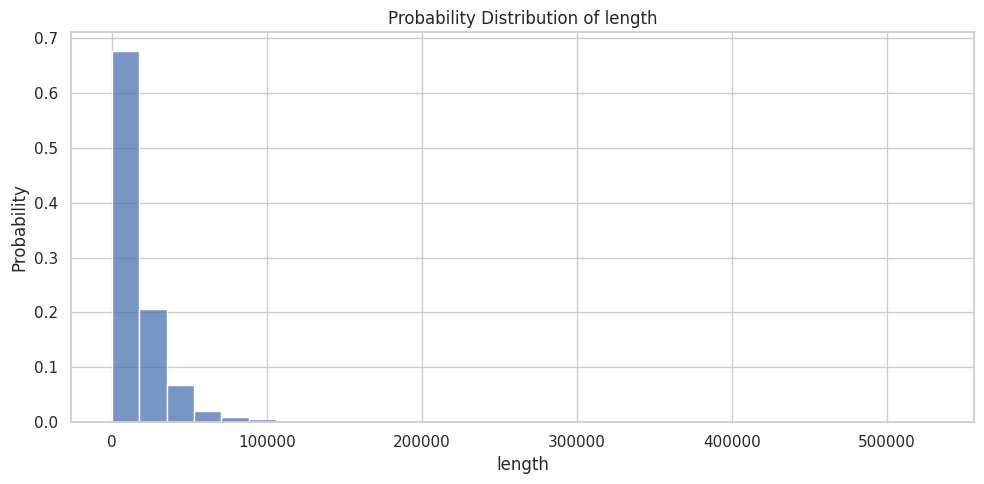

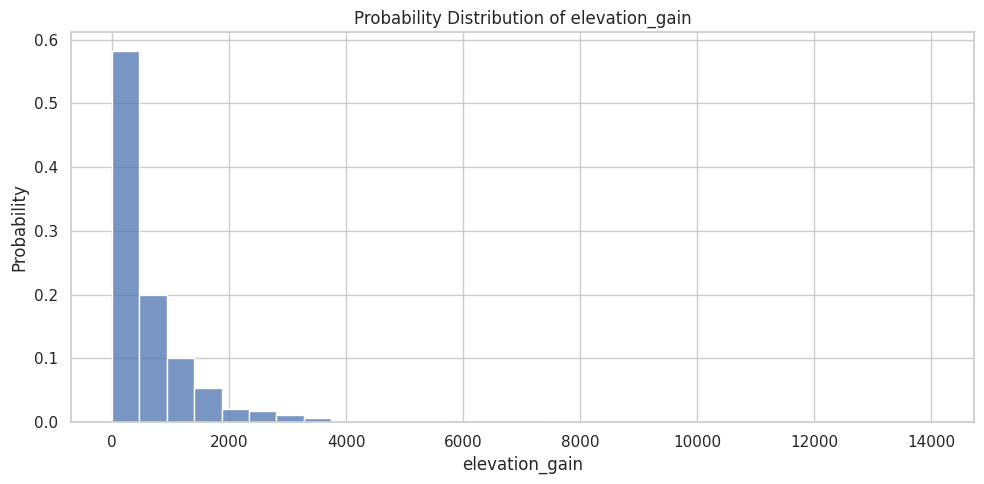

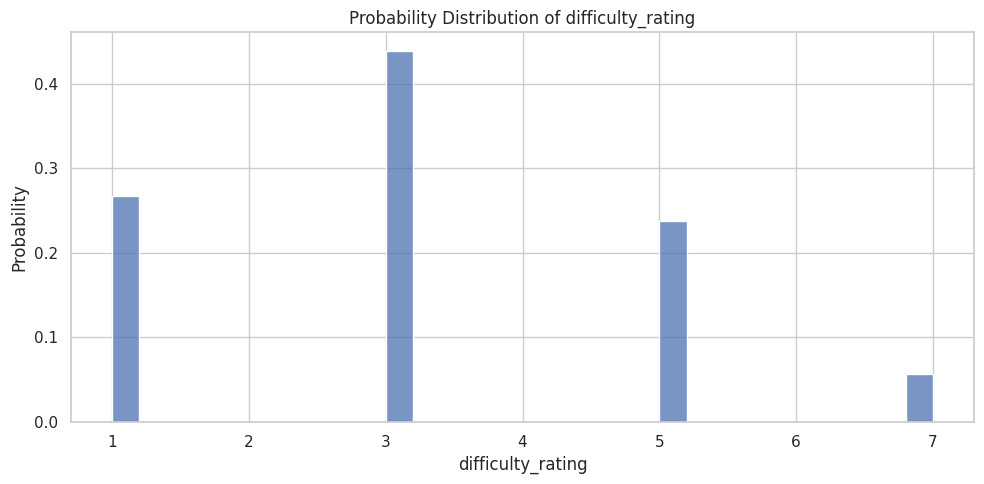

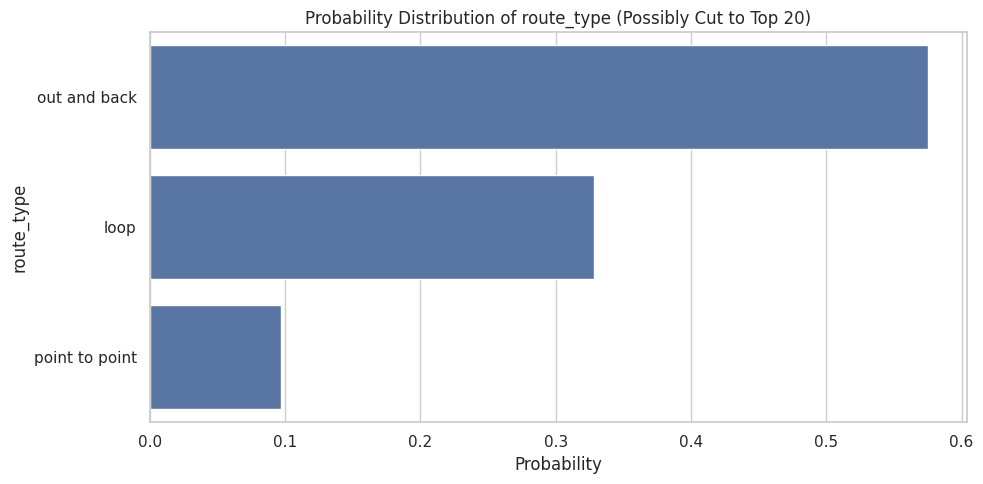

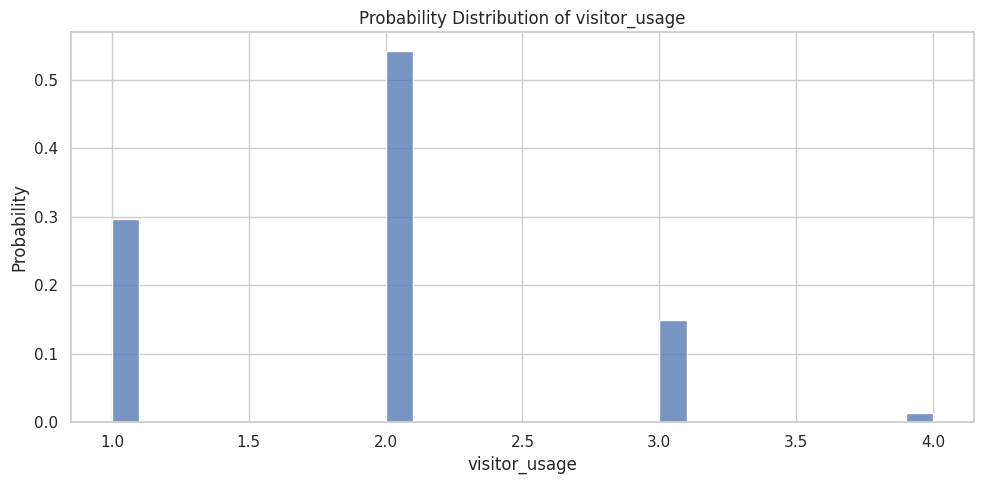

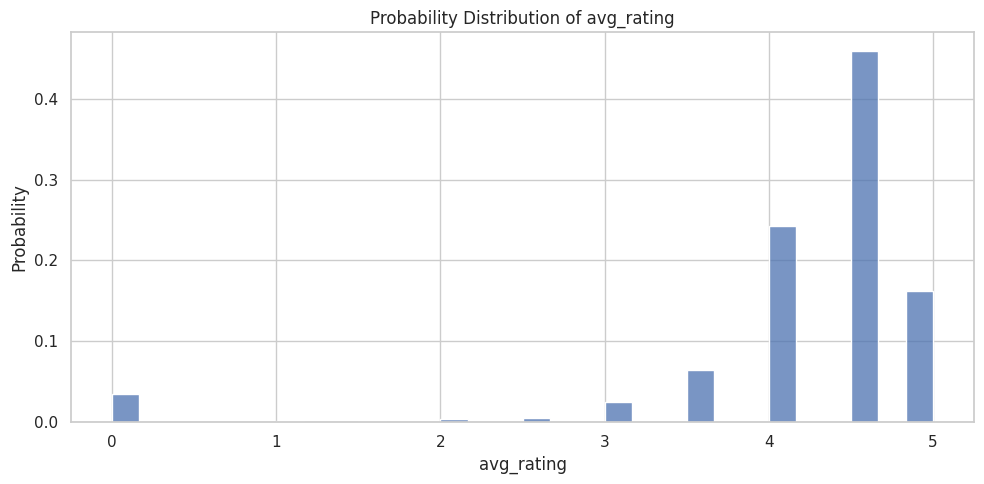

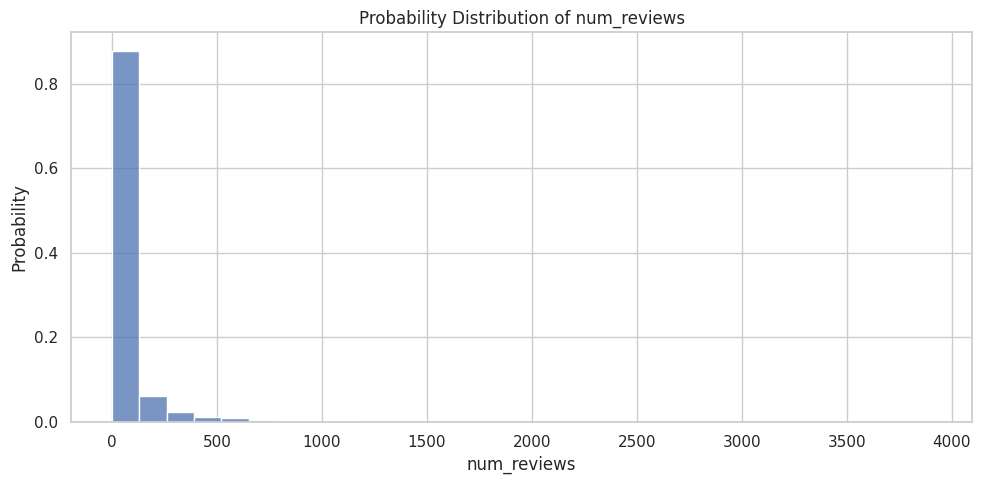

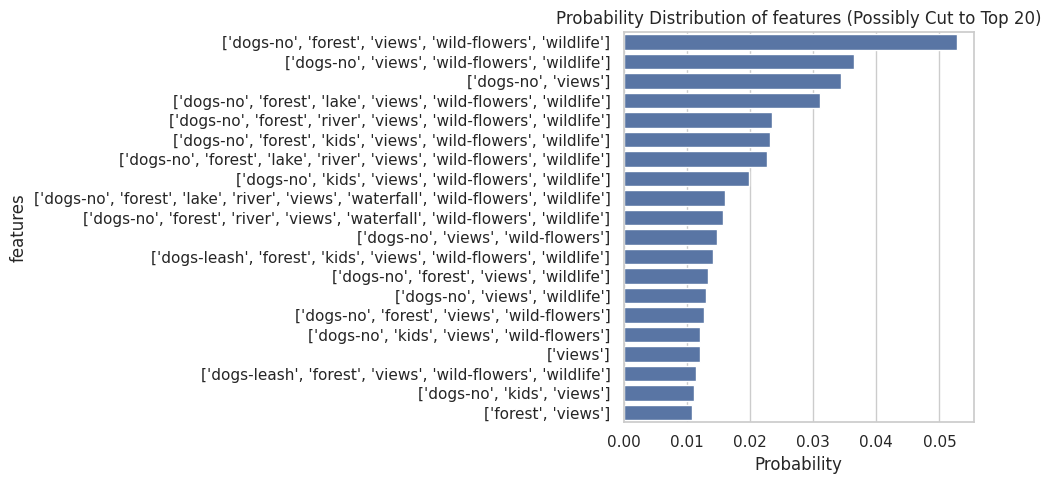

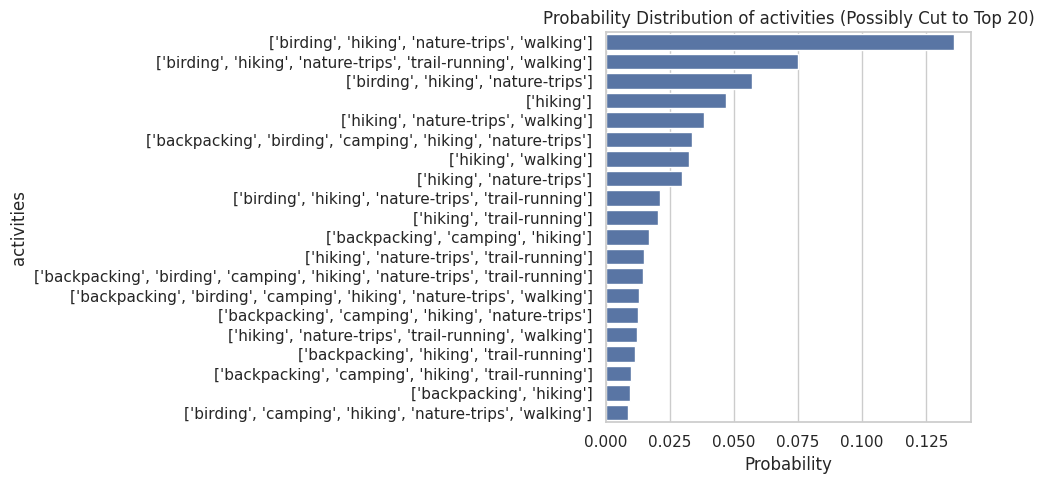

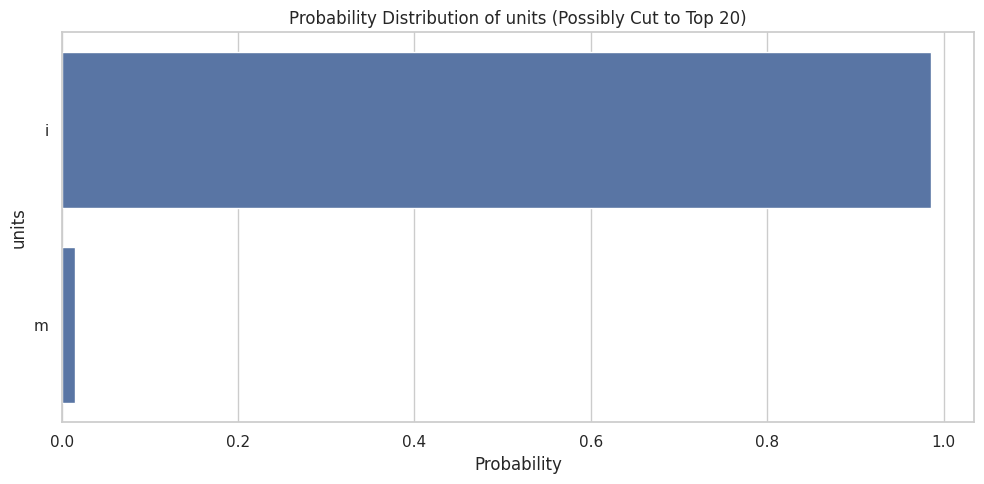

In [4]:


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

for col in df.columns:
    plt.figure()
    
    # Check if numeric
    if np.issubdtype(df[col].dtype, np.number):
        sns.histplot(df[col].dropna(), stat="probability", bins=30, kde=False)
        plt.title(f'Probability Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Probability')
    
    else:
        # Categorical
        value_counts = df[col].value_counts(normalize=True).head(20)
        sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
        plt.title(f'Probability Distribution of {col} (Possibly Cut to Top 20)')
        plt.xlabel('Probability')
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()


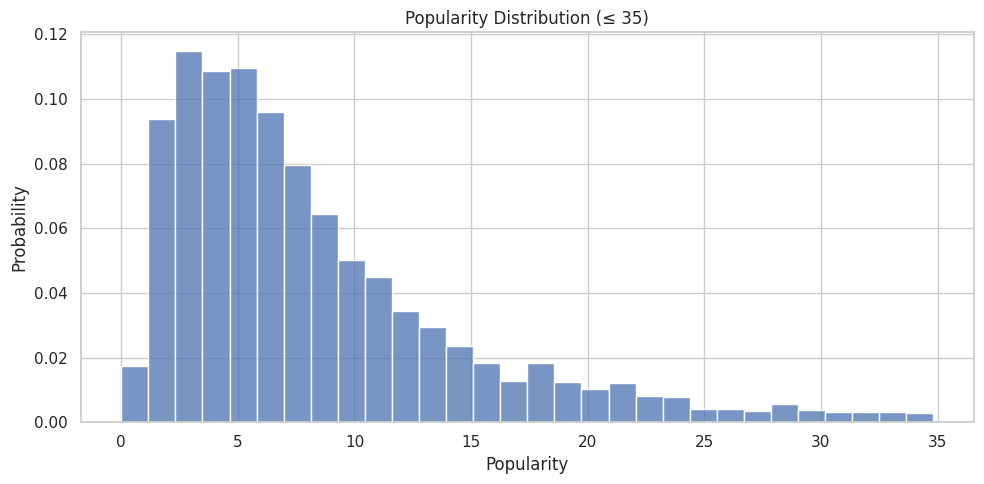

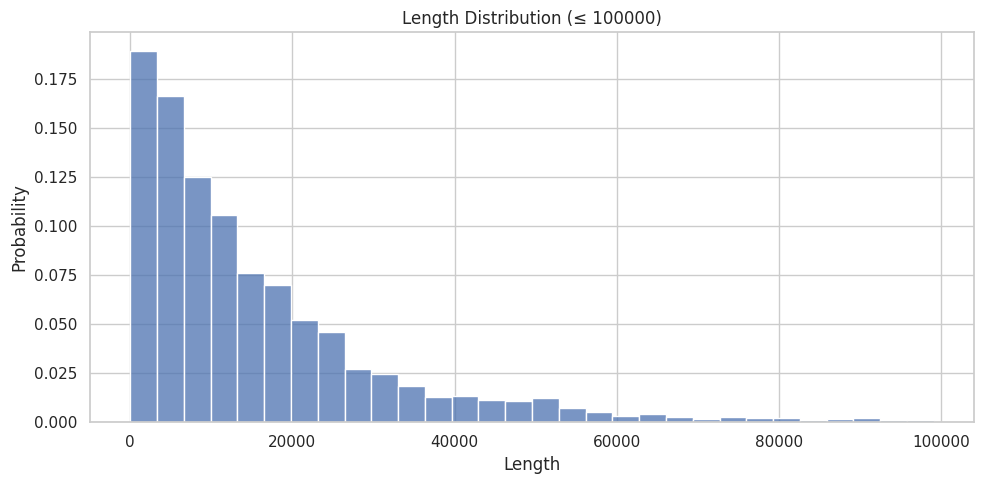

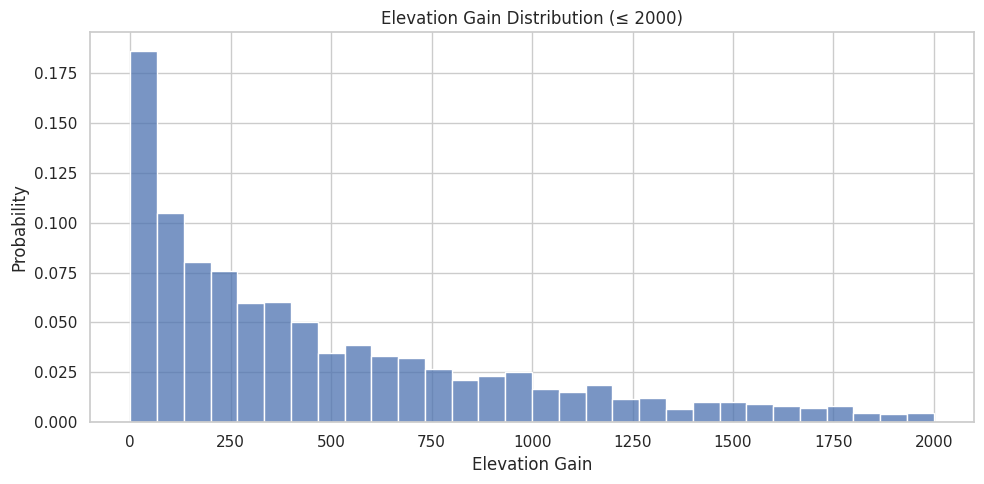

In [5]:
#length, elevation_gain, popularity

popularity_cutoff = 35
length_cutoff = 100000
elevation_cutoff = 2000

plt.figure()
filtered_length = df.loc[df['popularity'] <= popularity_cutoff, 'popularity'].dropna()
sns.histplot(filtered_length, bins=30, stat='probability', kde=False)
plt.title(f'Popularity Distribution (≤ {popularity_cutoff})')
plt.xlabel('Popularity')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

plt.figure()
filtered_length = df.loc[df['length'] <= length_cutoff, 'length'].dropna()
sns.histplot(filtered_length, bins=30, stat='probability', kde=False)
plt.title(f'Length Distribution (≤ {length_cutoff})')
plt.xlabel('Length')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

plt.figure()
filtered_elevation = df.loc[df['elevation_gain'] <= elevation_cutoff, 'elevation_gain'].dropna()
sns.histplot(filtered_elevation, bins=30, stat='probability', kde=False)
plt.title(f'Elevation Gain Distribution (≤ {elevation_cutoff})')
plt.xlabel('Elevation Gain')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()


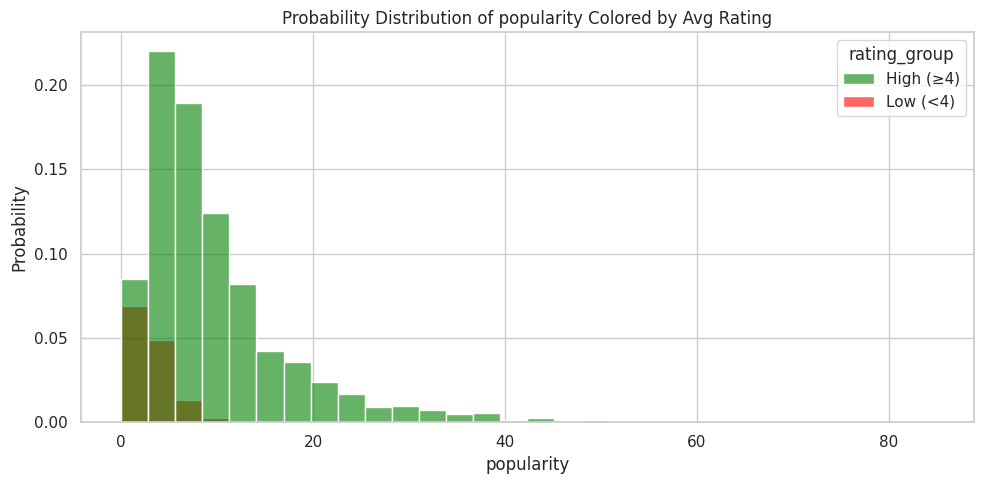

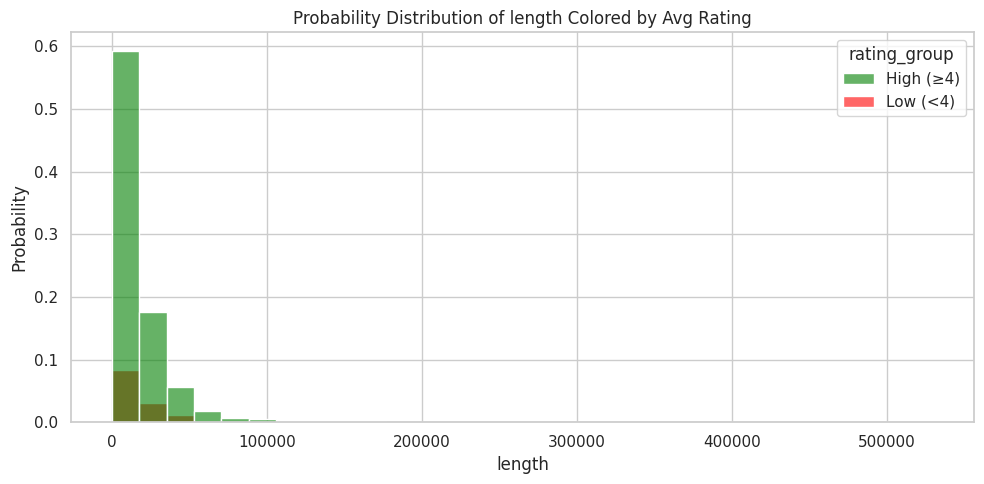

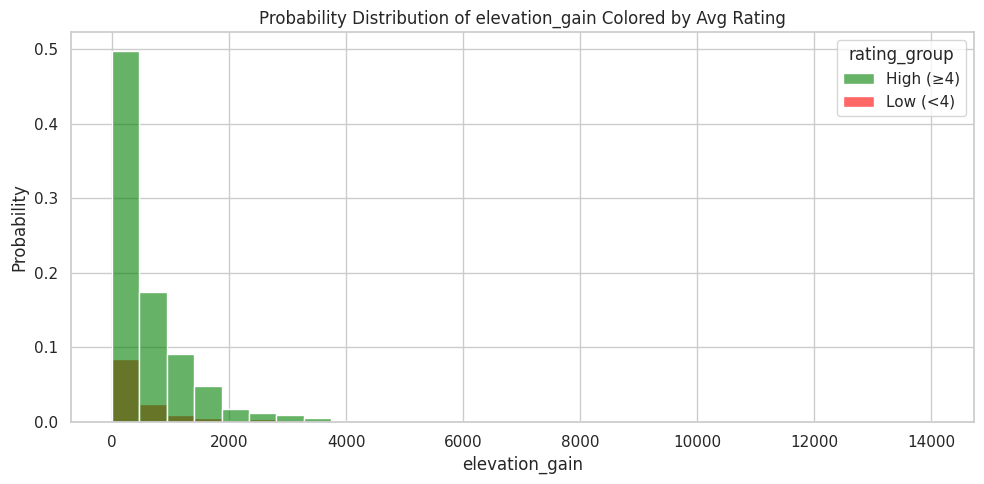

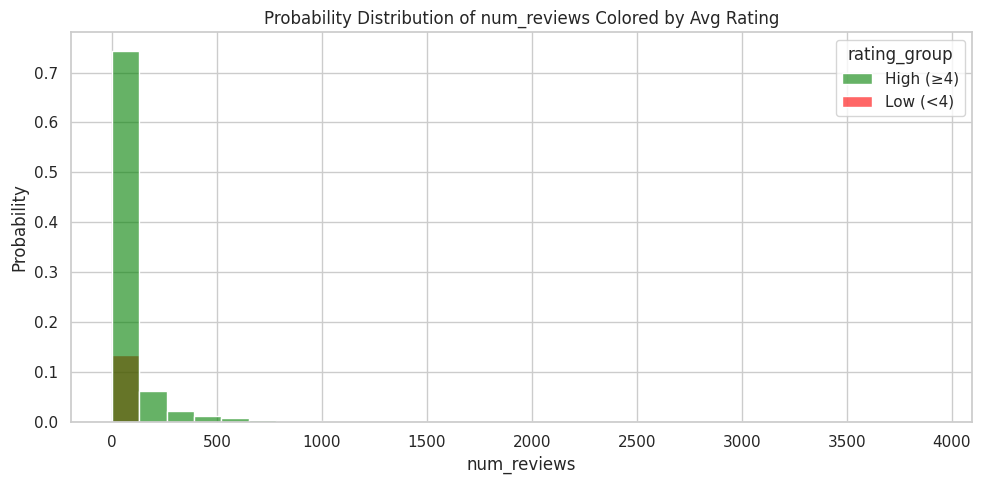

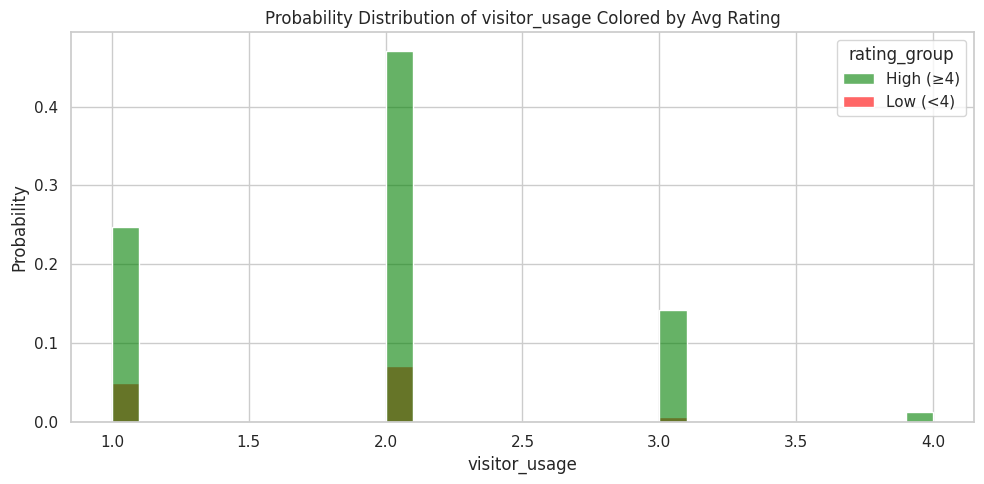

In [6]:

# numeric columns to plot
columns_to_plot = ['popularity', 'length', 'elevation_gain', 'num_reviews', 'visitor_usage']

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

for col in columns_to_plot:
    subset = df[[col, 'avg_rating']].dropna()

    # Create grouping
    subset['rating_group'] = subset['avg_rating'].apply(lambda x: 'High (≥4)' if x >= 4 else 'Low (<4)')

    plt.figure()
    plot = sns.histplot(
        data=subset,
        x=col,
        hue='rating_group',
        bins=30,
        stat='probability',
        palette={'High (≥4)': 'green', 'Low (<4)': 'red'},
        alpha=0.6
    )

    handles, labels = plot.get_legend_handles_labels()
    if labels:
        plt.legend(title="Avg Rating")
    
    plt.title(f'Probability Distribution of {col} Colored by Avg Rating')
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.tight_layout()
    plt.show()


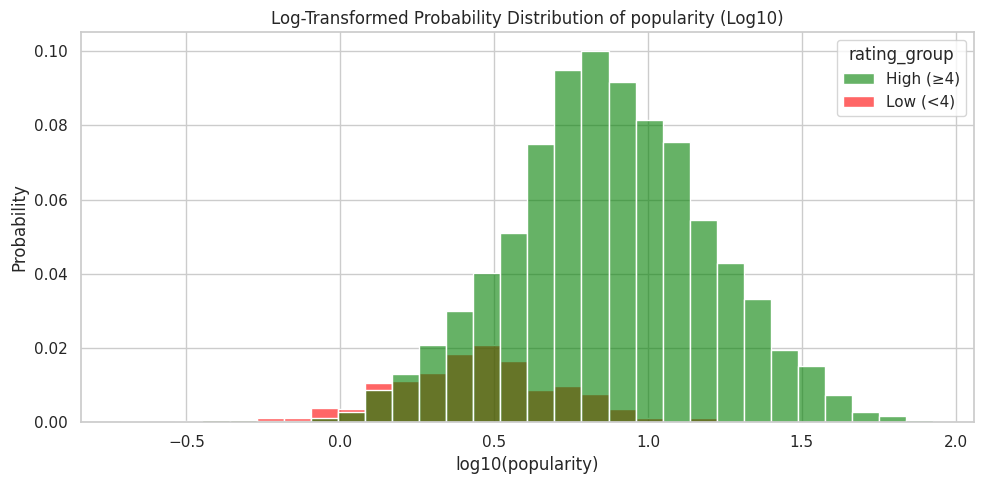

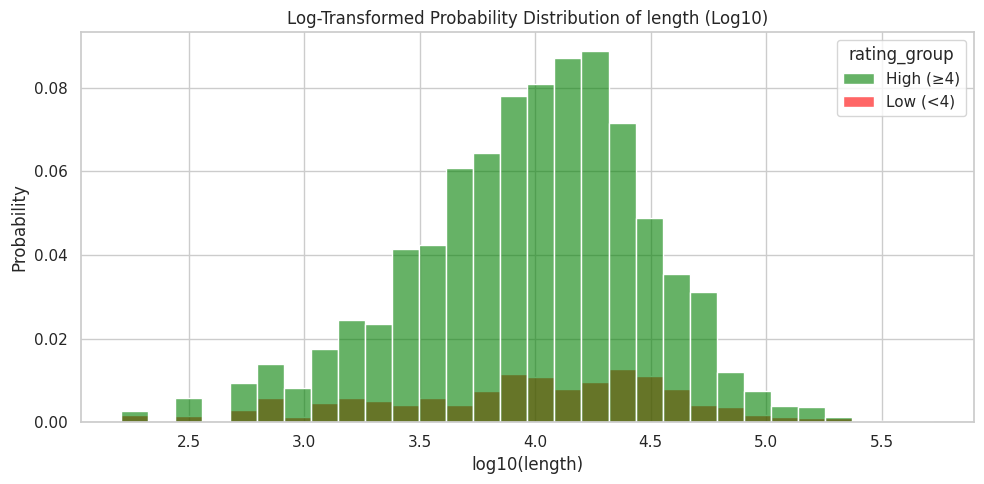

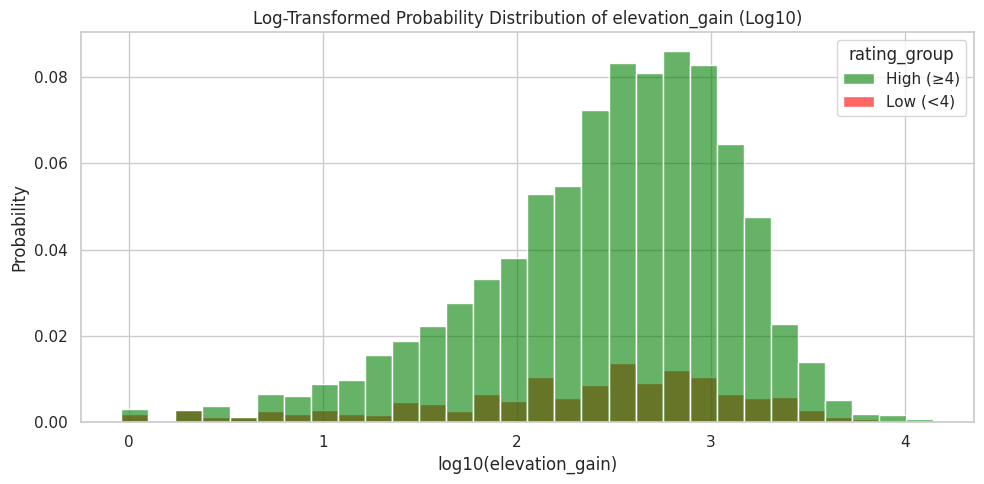

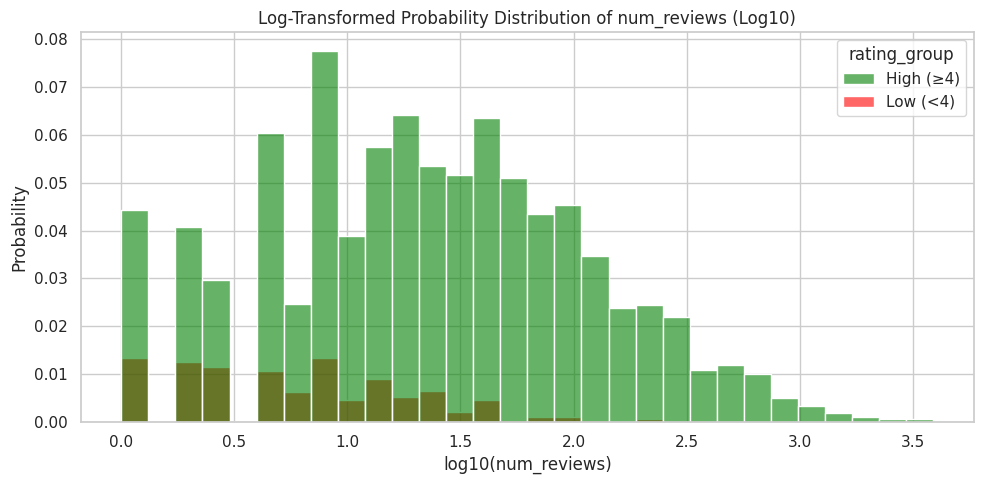

In [7]:
# Numeric columns to plot
columns_to_plot = ['popularity', 'length', 'elevation_gain', 'num_reviews']

# Plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

for col in columns_to_plot:
    subset = df[[col, 'avg_rating']].dropna()

    # Remove non-positive values before log-transform
    subset = subset[subset[col] > 0]

    if subset.empty or subset[col].nunique() < 2:
        continue

    # Apply log10 transformation
    subset[f'log_{col}'] = np.log10(subset[col])

    # Create rating group
    subset['rating_group'] = subset['avg_rating'].apply(lambda x: 'High (≥4)' if x >= 4 else 'Low (<4)')

    # Plot log-transformed histogram
    plt.figure()
    plot = sns.histplot(
        data=subset,
        x=f'log_{col}',
        hue='rating_group',
        bins=30,
        stat='probability',
        palette={'High (≥4)': 'green', 'Low (<4)': 'red'},
        alpha=0.6
    )

    handles, labels = plot.get_legend_handles_labels()
    if labels:
        plt.legend(title="Avg Rating")

    plt.title(f'Log-Transformed Probability Distribution of {col} (Log10)')
    plt.xlabel(f'log10({col})')
    plt.ylabel('Probability')
    plt.tight_layout()
    plt.show()


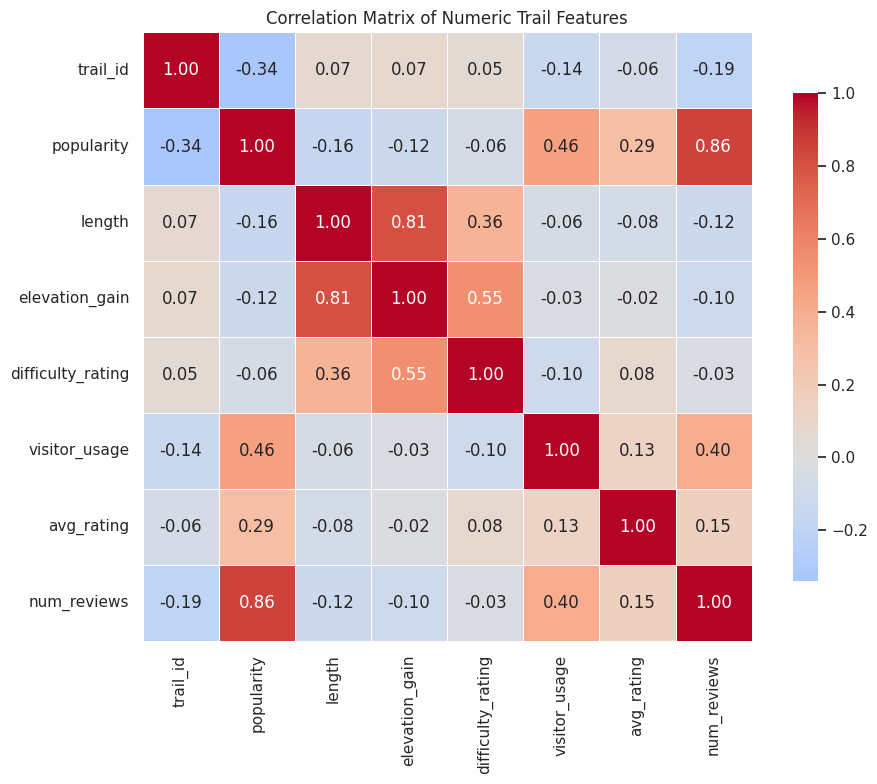

In [8]:
# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8}
)

plt.title("Correlation Matrix of Numeric Trail Features")
plt.tight_layout()
plt.show()


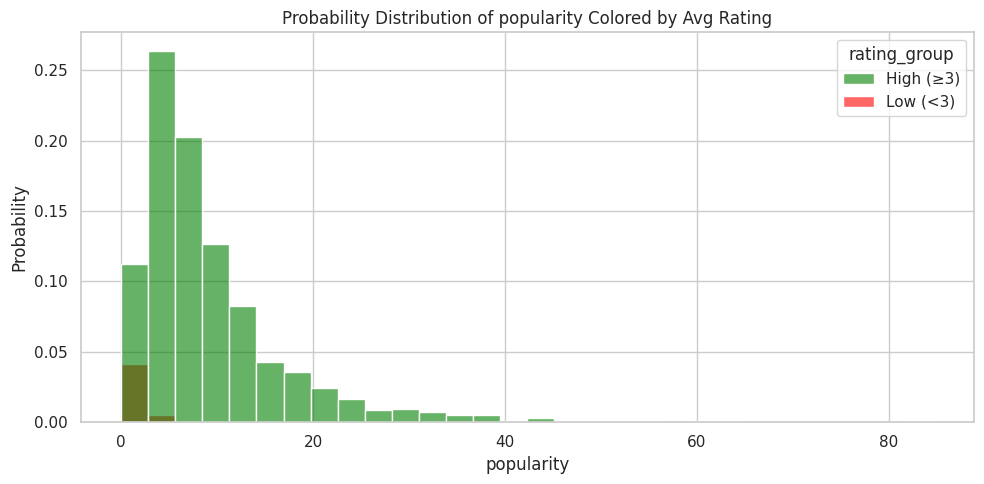

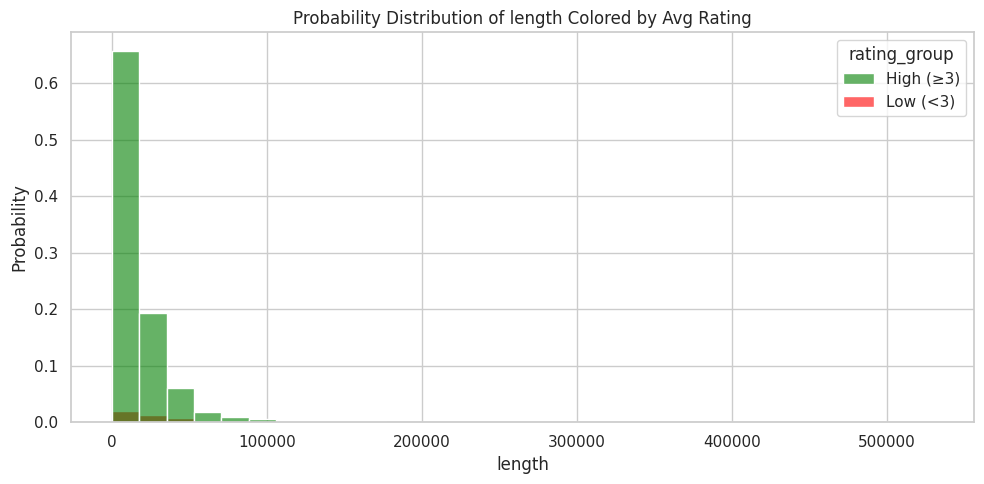

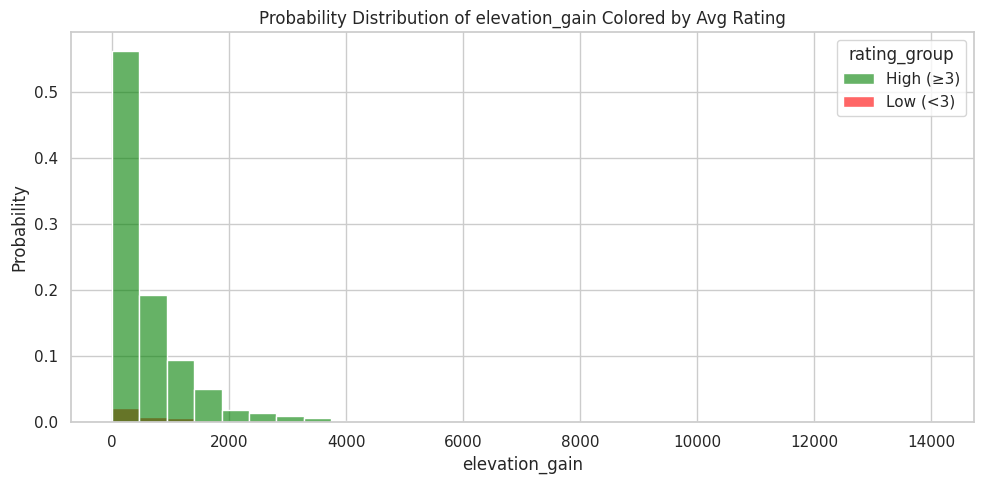

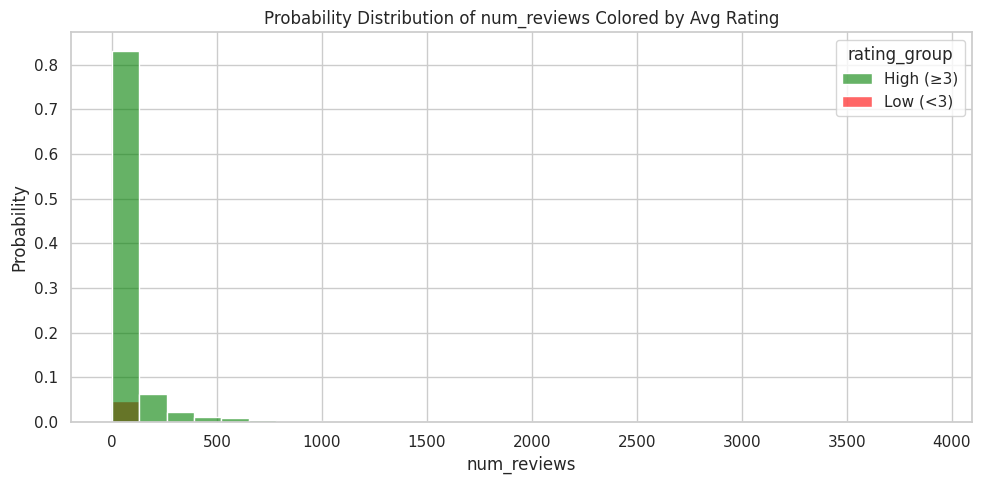

In [9]:

# List of numeric columns to plot
columns_to_plot = ['popularity', 'length', 'elevation_gain', 'num_reviews']

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

for col in columns_to_plot:
    subset = df[[col, 'avg_rating']].dropna()

    # Skip if the column has no variation
    if subset[col].nunique() < 2:
        continue

    # Create rating group
    subset['rating_group'] = subset['avg_rating'].apply(lambda x: 'High (≥3)' if x >= 3 else 'Low (<3)')

    # Plot
    plt.figure()
    plot = sns.histplot(
        data=subset,
        x=col,
        hue='rating_group',
        bins=30,
        stat='probability',
        palette={'High (≥3)': 'green', 'Low (<3)': 'red'},
        alpha=0.6
    )

    # Only show legend if both hue groups are present
    handles, labels = plot.get_legend_handles_labels()
    if labels:
        plt.legend(title="Avg Rating")
    
    plt.title(f'Probability Distribution of {col} Colored by Avg Rating')
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.tight_layout()
    plt.show()


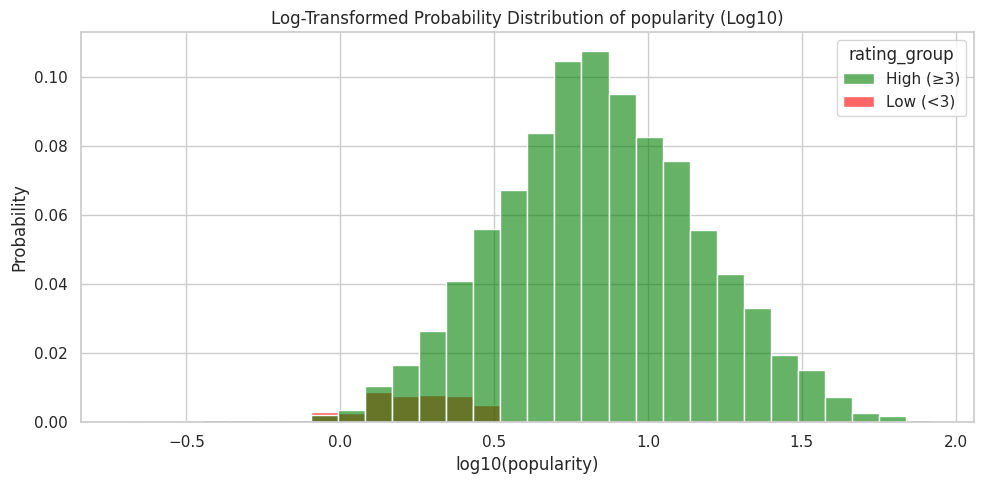

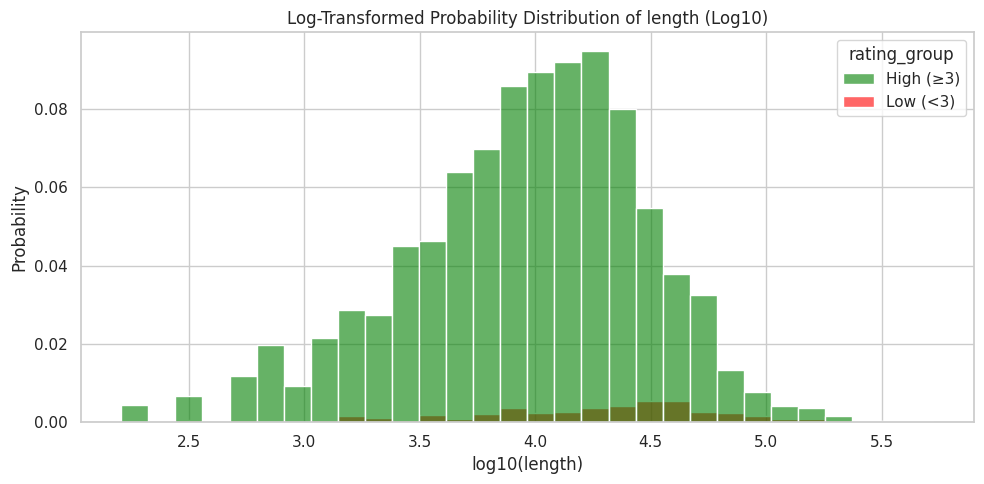

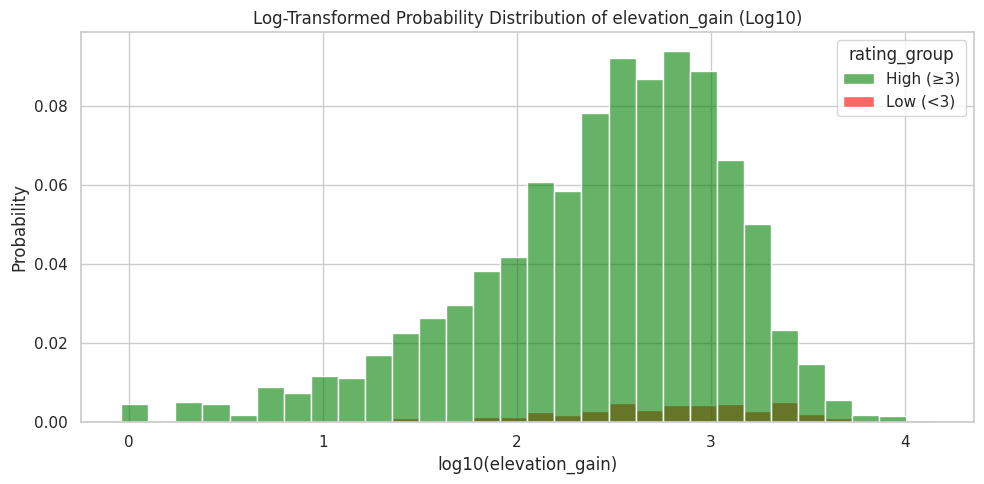

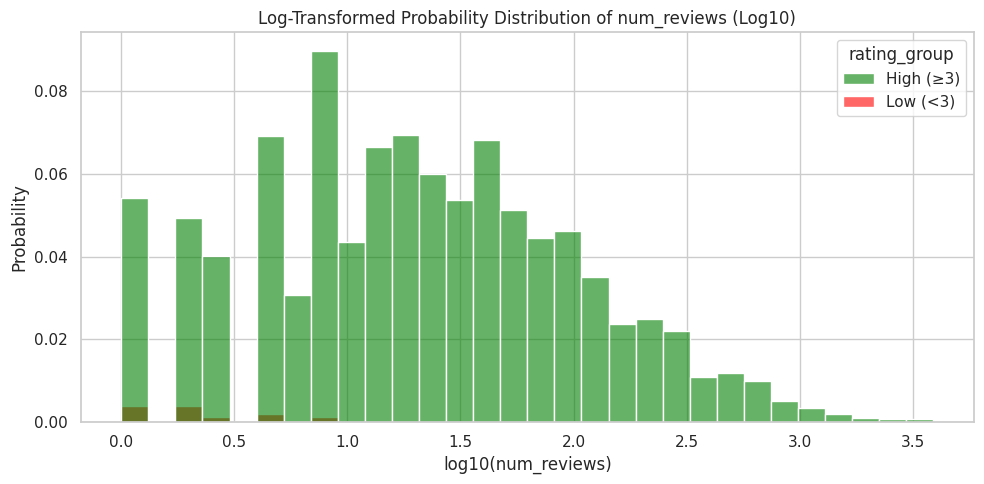

In [10]:
# Numeric columns to plot
columns_to_plot = ['popularity', 'length', 'elevation_gain', 'num_reviews']

# Plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

for col in columns_to_plot:
    subset = df[[col, 'avg_rating']].dropna()

    # Remove non-positive values before log-transform
    subset = subset[subset[col] > 0]

    if subset.empty or subset[col].nunique() < 2:
        continue

    # Apply log10 transformation
    subset[f'log_{col}'] = np.log10(subset[col])

    # Create rating group
    subset['rating_group'] = subset['avg_rating'].apply(lambda x: 'High (≥3)' if x >= 3 else 'Low (<3)')

    # Plot log-transformed histogram
    plt.figure()
    plot = sns.histplot(
        data=subset,
        x=f'log_{col}',
        hue='rating_group',
        bins=30,
        stat='probability',
        palette={'High (≥3)': 'green', 'Low (<3)': 'red'},
        alpha=0.6
    )

    handles, labels = plot.get_legend_handles_labels()
    if labels:
        plt.legend(title="Avg Rating")

    plt.title(f'Log-Transformed Probability Distribution of {col} (Log10)')
    plt.xlabel(f'log10({col})')
    plt.ylabel('Probability')
    plt.tight_layout()
    plt.show()


In [11]:
df.isnull().sum()

trail_id               0
name                   0
area_name              0
city_name              0
state_name             0
country_name           0
_geoloc                0
popularity             0
length                 0
elevation_gain         0
difficulty_rating      0
route_type             0
visitor_usage        253
avg_rating             0
num_reviews            0
features               0
activities             0
units                  0
dtype: int64

In [12]:
print(type(df['features'].iloc[0]))

<class 'str'>


In [13]:
import ast 
from sklearn.preprocessing import MultiLabelBinarizer

#one-hot encoding cat columns
categorical_columns_of_note = ['area_name', 'city_name', 'state_name', 'route_type']

df_encoded= pd.get_dummies(df, columns=categorical_columns_of_note, drop_first=True)


df_encoded.head()

,trail_id,name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,visitor_usage,avg_rating,...,state_name_South Carolina,state_name_South Dakota,state_name_Tennessee,state_name_Texas,state_name_Utah,state_name_Virginia,state_name_Washington,state_name_Wyoming,route_type_out and back,route_type_point to point
0,10020048,Harding Ice Field Trail,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,3.0,5.0,...,False,False,False,False,False,False,False,False,True,False
1,10236086,Mount Healy Overlook Trail,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,1.0,4.5,...,False,False,False,False,False,False,False,False,True,False
2,10267857,Exit Glacier Trail,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,3.0,4.5,...,False,False,False,False,False,False,False,False,True,False
3,10236076,Horseshoe Lake Trail,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,2.0,4.5,...,False,False,False,False,False,False,False,False,False,False
4,10236082,Triple Lakes Trail,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,1.0,4.5,...,False,False,False,False,False,False,False,False,True,False


In [14]:
#breaking up list features
df['features_list'] = df['features'].dropna().apply(ast.literal_eval)

df['features_list'] = df['features_list'].apply(lambda x: x if isinstance(x, list) else [])
mlb = MultiLabelBinarizer()
features_encoded = pd.DataFrame(mlb.fit_transform(df['features_list']), columns=[f'feature__{feat}' for feat in mlb.classes_], index=df.index)

df_encoded = pd.concat([df_encoded, features_encoded], axis=1)
drop_col= [col for col in ['features', 'features_list'] if col in df_encoded.columns]
df_encoded = df_encoded.drop(columns=drop_col)

In [15]:
df_encoded.head()

,trail_id,name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,visitor_usage,avg_rating,...,feature__lake,feature__partially-paved,feature__paved,feature__rails-trails,feature__river,feature__strollers,feature__views,feature__waterfall,feature__wild-flowers,feature__wildlife
0,10020048,Harding Ice Field Trail,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,3.0,5.0,...,0,0,0,0,1,0,1,1,1,1
1,10236086,Mount Healy Overlook Trail,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,1.0,4.5,...,0,0,0,0,0,0,1,0,1,1
2,10267857,Exit Glacier Trail,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,3.0,4.5,...,0,1,0,0,0,0,1,0,0,1
3,10236076,Horseshoe Lake Trail,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,2.0,4.5,...,1,0,0,0,0,0,1,0,1,1
4,10236082,Triple Lakes Trail,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,1.0,4.5,...,1,0,0,0,0,0,1,0,1,1


In [16]:
#breaking up list features of activities
df['activities_list'] = df['activities'].dropna().apply(ast.literal_eval)

df['activities_list'] = df['activities_list'].apply(lambda x: x if isinstance(x, list) else [])
mlb = MultiLabelBinarizer()
activities_encoded = pd.DataFrame(mlb.fit_transform(df['activities_list']), columns=[f'activity__{act}' for act in mlb.classes_], index=df.index)
#merge
df_encoded = pd.concat([df_encoded, features_encoded], axis=1)
#drop if needed
drop_col= [col for col in ['activities', 'activities_list'] if col in df_encoded.columns]
df_encoded = df_encoded.drop(columns=drop_col)

In [17]:
df_encoded.head()

,trail_id,name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,visitor_usage,avg_rating,...,feature__lake,feature__partially-paved,feature__paved,feature__rails-trails,feature__river,feature__strollers,feature__views,feature__waterfall,feature__wild-flowers,feature__wildlife
0,10020048,Harding Ice Field Trail,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,3.0,5.0,...,0,0,0,0,1,0,1,1,1,1
1,10236086,Mount Healy Overlook Trail,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,1.0,4.5,...,0,0,0,0,0,0,1,0,1,1
2,10267857,Exit Glacier Trail,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,3.0,4.5,...,0,1,0,0,0,0,1,0,0,1
3,10236076,Horseshoe Lake Trail,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,2.0,4.5,...,1,0,0,0,0,0,1,0,1,1
4,10236082,Triple Lakes Trail,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,1.0,4.5,...,1,0,0,0,0,0,1,0,1,1


In [18]:
df_encoded['log_length'] = np.log1p(df_encoded['length'])
df_encoded['log_elevation_gain'] = np.log1p(df_encoded['elevation_gain'])
df_encoded['log_popularity'] = np.log1p(df_encoded['popularity'])
df_encoded['log_num_reviews'] = np.log1p(df_encoded['num_reviews'])

In [34]:
X = df_encoded.drop(columns = columns_to_drop)
Y = df_encoded['avg_rating']
X.head()

,popularity,length,elevation_gain,difficulty_rating,num_reviews,area_name_Arches National Park,area_name_Badlands National Park,area_name_Big Bend National Park,area_name_Biscayne National Park,area_name_Black Canyon of the Gunnison National Park,...,feature__river,feature__strollers,feature__views,feature__waterfall,feature__wild-flowers,feature__wildlife,log_length,log_elevation_gain,log_popularity,log_num_reviews
0,24.8931,15610.598,1161.8976,5,423,False,False,False,False,False,...,1,0,1,1,1,1,9.655769,7.058670,3.253977,6.049733
1,18.0311,6920.162,507.7968,3,260,False,False,False,False,False,...,0,0,1,0,1,1,8.842339,6.232049,2.946074,5.564520
2,17.7821,2896.812,81.9912,1,224,False,False,False,False,False,...,0,0,1,0,0,1,7.971711,4.418735,2.932904,5.416100
3,16.2674,3379.614,119.7864,1,237,False,False,False,False,False,...,0,0,1,0,1,1,8.125813,4.794024,2.848820,5.472271
4,12.5935,29772.790,1124.7120,5,110,False,False,False,False,False,...,0,0,1,0,1,1,10.301384,7.026171,2.609592,4.709530


In [30]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(" Model Metrics:")
print(f" - RMSE: {rmse:.4f}")
print(f" - R2 Score: {r2:.4f}")


 Model Metrics:
 - RMSE: 0.7916
 - R2 Score: 0.0434


In [42]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)

# Fingers crossed
def evaluate_model(name, Y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    r2 = r2_score(Y_test, y_pred)
    print(f"\n🔍 {name} Evaluation:")
    print(f" - RMSE: {rmse:.4f}")
    print(f" - R² Score: {r2:.4f}")

evaluate_model("Random Forest", Y_test, y_pred_rf)



🔍 Random Forest Evaluation:
 - RMSE: 0.4428
 - R² Score: 0.7007


In [ ]:
# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, Y_train)
y_pred_xgb = xgb.predict(X_test)

evaluate_model("XGBoost", y_test, y_pred_xgb)
